# Projeto 02 (P2) - Inteligência Artificial  
## Esteira de Aprendizado de Máquina — Amazon Bestselling Books

Este notebook implementa uma esteira completa de Machine Learning seguindo os requisitos do projeto da disciplina:

- Estatísticas descritivas da base  
- Transformações em colunas  
- Transformações em linhas  
- Criação dos subconjuntos: treino, validação e teste  
- Treinamento de um modelo de classificação  
- Avaliação (acurácia e matriz de confusão)  
- Predição final usando o modelo treinado  

Dataset utilizado: **Amazon Top 50 Bestselling Books 2009–2019** (Kaggle).



In [ ]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Métricas de avaliação
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()  # fazer o upload do dataset

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [ ]:
df = pd.read_csv('bestsellers with categories.csv')  # carregar dataset
df.shape

(550, 7)

In [ ]:
# Estatísticas descritivas da base:
# Aqui verificamos informações gerais do dataset, como:
# - Quantidade de linhas e colunas (shape)
# - Tipos de dados e valores nulos
# - Estatísticas numéricas: média, desvio padrão, mínimo e máximo
# - Distribuição das categorias em 'Genre'


# primeiras linhas
df.head()

# colunas
df.columns.tolist()

# linhas e colunas
print("Shape:", df.shape)

# info e tipos
df.info()

# estatísticas numéricas
df.describe()

# contagem por categoria (aqui, 'Genre')
df['Genre'].value_counts()


Shape: (550, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,count
Genre,
Non Fiction,310
Fiction,240


In [ ]:
# Transformação em colunas
# - Converti a coluna 'Genre' para números, para que o modelo consiga usar essa informação.
# - Criei a coluna 'Popular', que vale 1 quando o livro tem reviews acima da mediana e 0 caso contrário.
#Isso permite treinar um modelo para identificar quais livros tendem a ser mais populares.

# transformar a coluna 'Genre' de texto para números
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])

# Criar a coluna alvo em formato binário: 1 = livro popular, 0 = não popular | por exemplo "popular" se Reviews >= mediana
med = df['Reviews'].median()
df['Popular'] = (df['Reviews'] >= med).astype(int)

df[['Genre','Genre_encoded','Reviews','Popular']].head()



,Genre,Genre_encoded,Reviews,Popular
0,Non Fiction,1,17350,1
1,Fiction,0,2052,0
2,Non Fiction,1,18979,1
3,Fiction,0,21424,1
4,Non Fiction,1,7665,0


In [ ]:
#Transformação em linhas
#Foram removidas linhas com dados faltando, preços inválidos e valores extremos de reviews.
#Essas limpezas deixam o conjunto de dados mais consistente e evitam que valores exagerados atrapalhem o modelo.

# verificar se existem dados faltando (missing values)
df.isnull().sum()

# remover linhas com dados faltando, se houver
df = df.dropna()

# remover livros com preço inválido (como preço negativo ou valores estranhos, por exemplo)
if 'Price' in df.columns:
    df = df[df['Price'] >= 0]

# remover outliers: excluir os valores de Reviews muito exagerados (acima do top 1%)
upper = df['Reviews'].quantile(0.99)
df = df[df['Reviews'] <= upper]

# mostrar quantas linhas e colunas restaram após a limpeza
print("Nova tabela após limpeza:", df.shape)


Nova tabela após limpeza: (542, 9)


In [ ]:
# Nesta etapa eu escolho quais colunas serão usadas como entrada do modelo (features) e defino a coluna 'Popular' como o alvo que quero prever.
# Essa preparação é necessária antes de treinar o modelo.

# colunas utilizadas como entrada do modelo
features = ['Reviews', 'Price', 'Year']

# X = dados de entrada (features)
X = df[features]

# y = alvo que o modelo deve aprender a prever
y = df['Popular']



In [ ]:
# Divisão dos dados para treinar e testar o modelo

# 1) Primeiro separo:
#  - 70% dos dados para treino (onde o modelo aprende)
#  - 30% dos dados ficam guardados temporariamente
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,     # 30% vai virar validação + teste
    random_state=42,   # garante que a divisão será igual sempre
    stratify=y         # mantém a mesma proporção de classes (Popular 0 e 1)
)

# 2) Agora pego os 30% e divido pela metade:
#  - 15% para validação (verificar o desempenho durante o treino)
#  - 15% para teste (avaliar no final)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,     # divide ao meio os 30%
    random_state=42,
    stratify=y_temp
)

# Mostra quantas linhas ficaram em cada parte da divisão
print(X_train.shape, X_val.shape, X_test.shape)


(379, 3) (81, 3) (82, 3)


In [ ]:
# Treinamento e validação do modelo

#modelo RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamos o modelo com os dados de treino
model.fit(X_train, y_train)

# previsões no conjunto de validação
y_val_pred = model.predict(X_val)

# calcular a acurácia no conjunto de validação
print("Val Acurácia:", accuracy_score(y_val, y_val_pred))

# Mostrar métricas detalhadas (precisão, recall, f1-score)
print(classification_report(y_val, y_val_pred))


Val Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        40

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [ ]:
#avaliação final (teste)
y_test_pred = model.predict(X_test)
print("Teste Acurácia:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Teste Acurácia: 0.975609756097561
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.95      1.00      0.98        41

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



Matriz de confusão:
 [[39  2]
 [ 0 41]]
Acurácia: 0.975609756097561


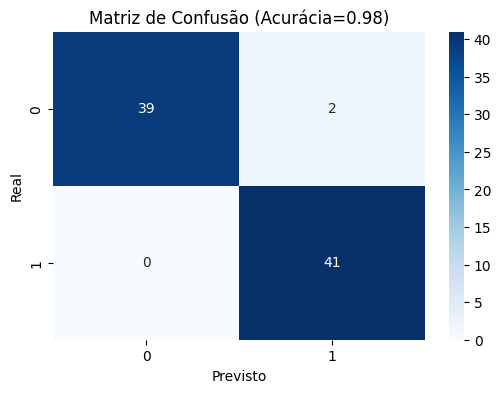

In [ ]:
# Avaliação final do modelo usando a matriz de confusão e acurácia

# previsões no conjunto de teste
y_test_pred = model.predict(X_test)

# crio a matriz de confusão (compara acertos e erros)
cm = confusion_matrix(y_test, y_test_pred)

# calculo a acurácia final do modelo
acc = accuracy_score(y_test, y_test_pred)

print("Matriz de confusão:\n", cm)
print("Acurácia:", acc)

# gera um gráfico visual da matriz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão (Acurácia={acc:.2f})')
plt.show()



In [ ]:
#predição do modelo usando um exemplo real

# Peguei a primeira linha do conjunto de teste como exemplo real
amostra = X_test.iloc[[0]]

# Faço a previsão com o modelo treinado
pred = model.predict(amostra)

# Exibo resultado: 0 = Não Popular, 1 = Popular
print("Predição (0 = Não Popular, 1 = Popular):", int(pred[0]))


Predição (0 = Não Popular, 1 = Popular): 1
